In [77]:
import numpy as np
import pandas as pd
import seaborn as sns                            #importing the laibrary
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [78]:
ds=pd.read_csv('Brainhead.csv')   # loading the dataset
ds.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [79]:
ds.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [80]:
ds.shape   # showing the rows and columns

(237, 4)

In [81]:
ds.dtypes

Gender                 int64
Age Range              int64
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

In [82]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [83]:
ds.isnull().sum()    # finding the missing values

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

there is no missing values

<AxesSubplot:>

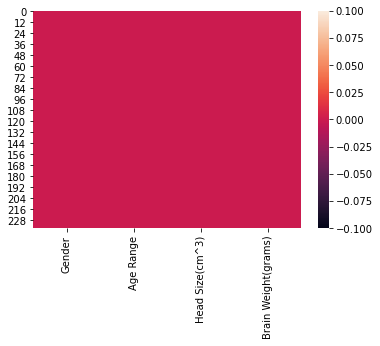

In [84]:
sns.heatmap(ds.isnull())    #finding the missing value with heat map

In [85]:
ds.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


<AxesSubplot:>

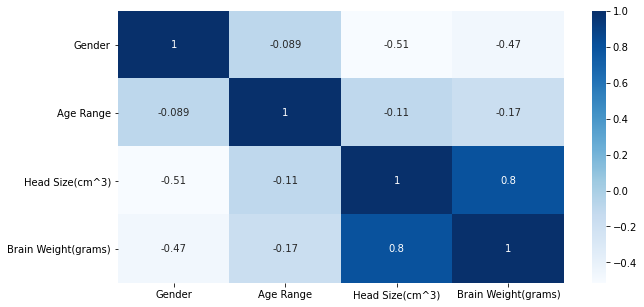

In [86]:
fig=plt.figure(figsize=(10,5))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

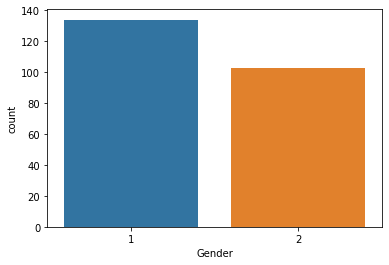

In [87]:
sns.countplot(x="Gender",data=ds)
plt.show()

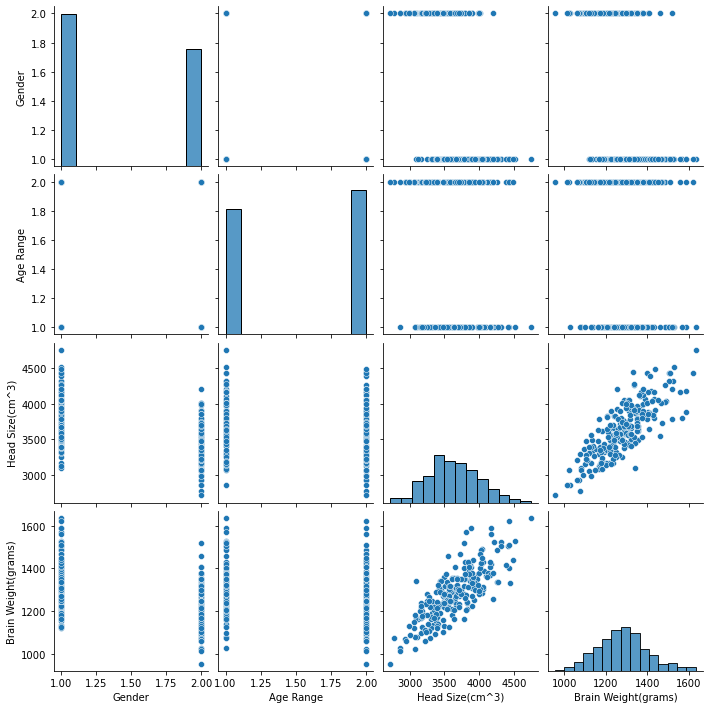

In [88]:
sns.pairplot(ds)

In [89]:
ds.skew()       #finding the skewness

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

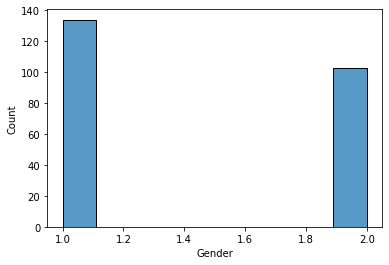

In [90]:
sns.histplot(ds['Gender'])

<AxesSubplot:xlabel='Age Range', ylabel='Count'>

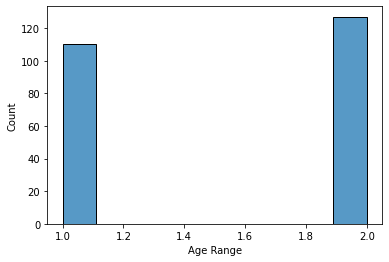

In [91]:
sns.histplot(ds['Age Range'])

<AxesSubplot:xlabel='Head Size(cm^3)', ylabel='Count'>

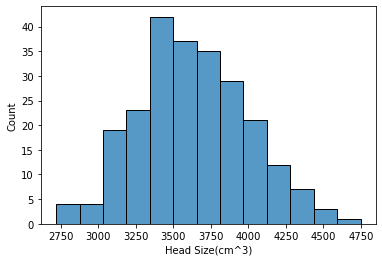

In [92]:
sns.histplot(ds['Head Size(cm^3)'])

<AxesSubplot:xlabel='Brain Weight(grams)', ylabel='Count'>

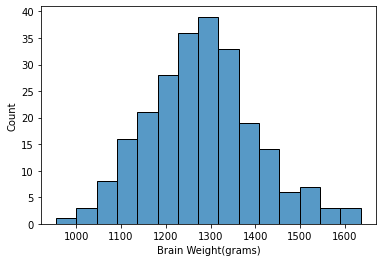

In [93]:
sns.histplot(ds['Brain Weight(grams)'])

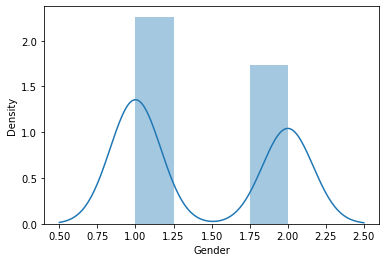

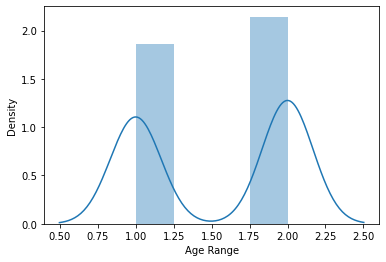

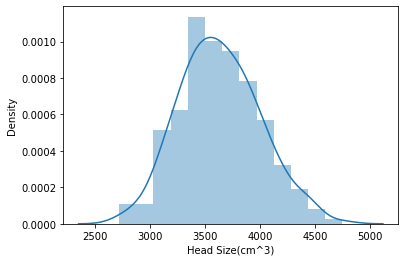

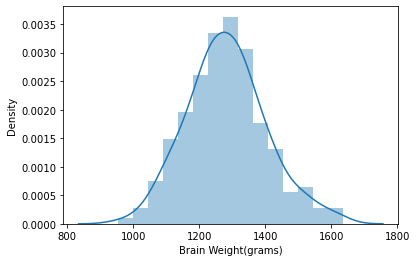

In [94]:
columns=['Gender','Age Range','Head Size(cm^3)','Brain Weight(grams)']
for i in ds[columns]:
    plt.figure()
    sns.distplot(ds[i])

Gender                    AxesSubplot(0.125,0.125;0.168478x0.755)
Age Range              AxesSubplot(0.327174,0.125;0.168478x0.755)
Head Size(cm^3)        AxesSubplot(0.529348,0.125;0.168478x0.755)
Brain Weight(grams)    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

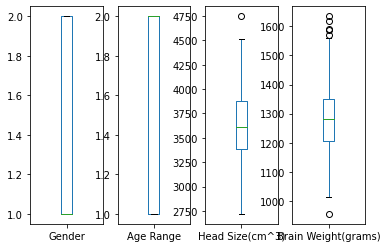

In [95]:
ds.plot(kind='box',subplots=True,layout=(1,4))

In [96]:
from scipy.stats import zscore
zscr=np.abs(zscore(ds))
threshold=3
print(np.where(zscr>3))

(array([24], dtype=int64), array([2], dtype=int64))


In [97]:
zscr[25][3]

1.8497246750123209

In [98]:
zscr[124][2]


1.1440874171156548

In [99]:
print("shape before removing the outlier:",ds.shape)
dsnew=ds[(zscr<3).all(axis=1)]
print("shape after removing the outlier;",dsnew.shape)

shape before removing the outlier: (237, 4)
shape after removing the outlier; (236, 4)


In [100]:
ds=dsnew

In [101]:
ds_x=ds.drop(columns=["Brain Weight(grams)"])
y=ds[["Brain Weight(grams)"]]

In [102]:
for i in ds_x.columns:
    if ds_x[i].skew()>0.5:
        ds_x[i]=np.cbrt(ds_x[i])
    if ds_x[i].skew()<-0.5:
        ds_x[i]=np.cbrt(ds_x[i])
        
ds_x.skew()

Gender             0.257959
Age Range         -0.153968
Head Size(cm^3)    0.164767
dtype: float64

In [103]:
ds_x

,Gender,Age Range,Head Size(cm^3)
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177
...,...,...,...
232,2,2,3214
233,2,2,3394
234,2,2,3233
235,2,2,3352


In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)
x

,Gender,Age Range,Head Size(cm^3)
0,-0.880021,-1.079415,2.465898
1,-0.880021,-1.079415,0.303723
2,-0.880021,-1.079415,1.764728
3,-0.880021,-1.079415,0.412670
4,-0.880021,-1.079415,1.530073
...,...,...,...
231,1.136337,0.926427,-1.160075
232,1.136337,0.926427,-0.657244
233,1.136337,0.926427,-1.106999
234,1.136337,0.926427,-0.774571


In [105]:
x.shape

(236, 3)

In [106]:
y.shape

(236, 1)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(184, 3)
(52, 3)
(184, 1)
(52, 1)


In [109]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.038461538461538464
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1012       0.00      0.00      0.00         1
        1027       0.00      0.00      0.00         1
        1060       0.00      0.00      0.00         1
        1120       0.00      0.00      0.00         1
        1127       0.00      0.00      0.00         0
        1130       0.00      0.00      0.00         1
        1154       0.00      0.00      0.00         1
        1165       0.00      0.00      0.00         1
        1168       0.00      0.00      0.00         1
        1178       0.00      0.00      0.00         1
        1180       0.00      0.00      0.00         2
        1188       0.00      0.00      0.00         1
        1210       0.00      0.00      0.00         0
        1220       0.08      1.00      0.14         1
        1225       0.00      0.00      0.00     

In [110]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.038461538461538464
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1012       0.00      0.00      0.00         1
        1027       0.00      0.00      0.00         1
        1060       0.00      0.00      0.00         1
        1120       0.00      0.00      0.00         1
        1127       0.00      0.00      0.00         0
        1130       0.00      0.00      0.00         1
        1154       0.00      0.00      0.00         1
        1165       0.00      0.00      0.00         1
        1168       0.00      0.00      0.00         1
        1170       0.00      0.00      0.00         0
        1178       0.00      0.00      0.00         1
        1180       0.00      0.00      0.00         2
        1188       0.00      0.00      0.00         1
        1210       0.00      0.00      0.00         0
        1220       0.14      1.0

In [111]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.038461538461538464
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1012       0.00      0.00      0.00         1
        1027       0.00      0.00      0.00         1
        1060       0.00      0.00      0.00         1
        1120       0.00      0.00      0.00         1
        1127       0.00      0.00      0.00         0
        1130       0.00      0.00      0.00         1
        1154       0.00      0.00      0.00         1
        1165       0.00      0.00      0.00         1
        1168       0.00      0.00      0.00         1
        1178       0.00      0.00      0.00         1
        1180       0.00      0.00      0.00         2
        1188       0.00      0.00      0.00         1
        1210       0.00      0.00      0.00         0
        1220       0.12      1.00      0.22         1
        1225       0.00      0.0

In [113]:
rf=RandomForestClassifier(n_estimators=100)   #finding the accuracy score with randomforestclassifier
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.019230769230769232
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1012       0.00      0.00      0.00         1
        1027       0.00      0.00      0.00         1
        1060       0.00      0.00      0.00         1
        1070       0.00      0.00      0.00         0
        1075       0.00      0.00      0.00         0
        1078       0.00      0.00      0.00         0
        1103       0.00      0.00      0.00         0
        1104       0.00      0.00      0.00         0
        1120       0.00      0.00      0.00         1
        1130       0.00      0.00      0.00         1
        1150       0.00      0.00      0.00         0
        1154       0.00      0.00      0.00         1
        1165       0.00      0.00      0.00         1
        1168       0.00      0.00      0.00         1
        1175       0.00      0.0

In [114]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.04166667 0.04255319 0.04255319 0.04255319 0.0212766 ]
0.038120567375886524


In [115]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.        0.        0.        0.        0.0212766]
0.00425531914893617


In [116]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.         0.0212766  0.0212766  0.04255319 0.        ]
0.01702127659574468


In [117]:
joblib.dump(rf,"Brainhead.obj")

['Brainhead.obj']

In [118]:
Brainfile=joblib.load("Brainhead.obj")
Brainfile.predict(x_train)

array([1110, 1250, 1192, 1400, 1485, 1360, 1290, 1525, 1588, 1185, 1204,
       1375, 1297, 1245, 1180, 1165, 1022, 1560, 1506, 1275, 1270, 1350,
       1355, 1430, 1275, 1296, 1215, 1163, 1173, 1245, 1300, 1425, 1340,
       1132, 1334, 1422, 1290, 1290, 1374, 1200, 1400, 1357, 1432, 1270,
       1432, 1240, 1105, 1485, 1350, 1306, 1279, 1350, 1346, 1130, 1322,
       1120, 1127, 1250, 1321, 1335, 1160, 1250, 1320, 1468, 1237, 1235,
       1415, 1080, 1432, 1242, 1440, 1180, 1192, 1190, 1220,  955, 1340,
       1380, 1240, 1175, 1490, 1408, 1060, 1280, 1590, 1225, 1460, 1355,
       1522, 1300, 1364, 1078, 1470, 1620, 1220, 1380, 1104, 1275, 1127,
       1165, 1320, 1235, 1309, 1208, 1120, 1175, 1103, 1125, 1400, 1316,
       1505, 1390, 1142, 1450, 1270, 1243, 1390, 1173, 1205, 1350, 1220,
       1218, 1090, 1255, 1310, 1195, 1243, 1170, 1300, 1302, 1373, 1202,
       1220, 1282, 1520, 1280, 1260, 1311, 1412, 1330, 1260, 1095, 1420,
       1256, 1100, 1300, 1075, 1240, 1290, 1175, 14

In [119]:
model=[lg,sv,gnb,rf]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score: of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy score: of LogisticRegression()
0.038461538461538464
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1012       0.00      0.00      0.00         1
        1027       0.00      0.00      0.00         1
        1060       0.00      0.00      0.00         1
        1120       0.00      0.00      0.00         1
        1127       0.00      0.00      0.00         0
        1130       0.00      0.00      0.00         1
        1154       0.00      0.00      0.00         1
        1165       0.00      0.00      0.00         1
        1168       0.00      0.00      0.00         1
        1178       0.00      0.00      0.00         1
        1180       0.00      0.00      0.00         2
        1188       0.00      0.00      0.00         1
        1210       0.00      0.00      0.00         0
        1220       0.08      1.00      0.14         1
        

In [120]:
joblib.dump(sv,"svmodel1.obj")

['svmodel1.obj']

In [121]:
svfile=joblib.load("svmodel1.obj")
svfile.predict(x_train)

array([1220, 1290, 1290, 1400, 1415, 1290, 1290, 1400, 1290, 1220, 1220,
       1350, 1350, 1290, 1290, 1290, 1220, 1415, 1400, 1290, 1290, 1290,
       1350, 1290, 1350, 1250, 1300, 1210, 1290, 1290, 1250, 1300, 1350,
       1290, 1350, 1400, 1290, 1290, 1350, 1127, 1400, 1350, 1350, 1290,
       1400, 1290, 1220, 1400, 1350, 1210, 1290, 1210, 1290, 1220, 1127,
       1220, 1127, 1250, 1350, 1290, 1210, 1127, 1250, 1290, 1220, 1235,
       1290, 1250, 1300, 1290, 1290, 1250, 1235, 1127, 1290,  955, 1300,
       1250, 1210, 1127, 1400, 1250, 1220, 1210, 1400, 1220, 1210, 1350,
       1400, 1350, 1400, 1250, 1290, 1415, 1250, 1350, 1220, 1350, 1210,
       1290, 1350, 1350, 1290, 1350, 1290, 1220, 1250, 1290, 1350, 1210,
       1400, 1290, 1220, 1300, 1350, 1127, 1400, 1290, 1210, 1250, 1220,
       1290, 1220, 1350, 1350, 1290, 1220, 1127, 1290, 1350, 1350, 1127,
       1220, 1350, 1350, 1350, 1290, 1350, 1290, 1415, 1350, 1220, 1400,
       1415, 1127, 1350, 1127, 1290, 1290, 1290, 12